In [66]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines


from scipy.interpolate import interp1d
plt.rcParams["font.family"] = "serif"



def mumuFrom14(x):
    return np.sin(2*np.arcsin(np.sqrt(x)))**2


def getContour2(x,y,z):
    N=1000

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    return [xi,yi,zi]

def getContour(x,y,z,val):
    N=1000

    levels = [val]

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels, colors='black', linewidth=.5)
    
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    return v


execfile("/Users/yeon-jaejwa/sandbox/colors.py")

label_font_size= 28

tick_font_size= 15
text_font_size= 22

c1 = cr1
c0 = gCols[1]
c2 = cb1
c3 = bCols[2]
c3b = bCols[0]

cg = cCols[2]

In [67]:
# First up, im going to check for differences in using sig or bkg as core of chi^2
dcpIO=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_cpv_IO.dat")
#DUNE_cpv.dat
dcpNO=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_cpv2.dat")
#DUNE_cpv_NO.dat

dcp4NO=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_cpv4_NO.dat")
#DUNE_cpv_NO.dat

dcp4IO=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_cpv4_IO.dat")
#DUNE_cpv_NO.dat

dcp3to4=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_cpv3+1to3+0_IO.dat")
#DUNE_cpv_NO.dat


dune_cdr=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/plots/NO_dune.csv")

#dcp2=np.genfromtxt("/home/mark/work/pheno/DUNE+SBN/build/src/t10_2")
#dcp2=np.genfromtxt("/home/mark/work/pheno/DUNE+SBN/build/src/DUNE_data_normal.dat")
#dcp3=np.genfromtxt("/home/mark/work/pheno/DUNE+SBN/build/src/DUNE_data_inverted.dat")



In [68]:
dcp3to4

array([[       nan,        nan,   0.      ,  33.233   ,  29.8237  ,
          3.40935 ],
       [       nan,        nan,   5.      ,  34.4388  ,  29.3198  ,
          5.11894 ],
       [       nan,        nan,  10.      ,  35.8693  ,  28.7395  ,
          7.1298  ],
       [       nan,        nan,  15.      ,  37.5368  ,  28.1109  ,
          9.42585 ],
       [       nan,        nan,  20.      ,  39.4601  ,  27.4419  ,
         12.0182  ],
       [       nan,        nan,  25.      ,  41.664   ,  26.7591  ,
         14.9048  ],
       [       nan,        nan,  30.      ,  44.1764  ,  26.1359  ,
         18.0405  ],
       [       nan,        nan,  35.      ,  47.0259  ,  25.6142  ,
         21.4117  ],
       [       nan,        nan,  40.      ,  50.2379  ,  25.2365  ,
         25.0014  ],
       [       nan,        nan,  45.      ,  53.5712  ,  24.9695  ,
         28.6017  ],
       [       nan,        nan,  50.      ,  56.9361  ,  24.8922  ,
         32.0439  ],
       [       nan,  

In [69]:
dcpNO

array([[        nan,         nan, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [        nan,         nan, 5.00000e+00, 2.50734e-01, 0.00000e+00,
        2.50734e-01],
       [        nan,         nan, 1.00000e+01, 1.00377e+00, 0.00000e+00,
        1.00377e+00],
       [        nan,         nan, 1.50000e+01, 2.25251e+00, 0.00000e+00,
        2.25251e+00],
       [        nan,         nan, 2.00000e+01, 3.98010e+00, 0.00000e+00,
        3.98010e+00],
       [        nan,         nan, 2.50000e+01, 6.15964e+00, 0.00000e+00,
        6.15964e+00],
       [        nan,         nan, 3.00000e+01, 8.75449e+00, 0.00000e+00,
        8.75449e+00],
       [        nan,         nan, 3.50000e+01, 1.17186e+01, 0.00000e+00,
        1.17186e+01],
       [        nan,         nan, 4.00000e+01, 1.49973e+01, 0.00000e+00,
        1.49973e+01],
       [        nan,         nan, 4.50000e+01, 1.85276e+01, 0.00000e+00,
        1.85276e+01],
       [        nan,         nan, 5.00000e+01, 2.2

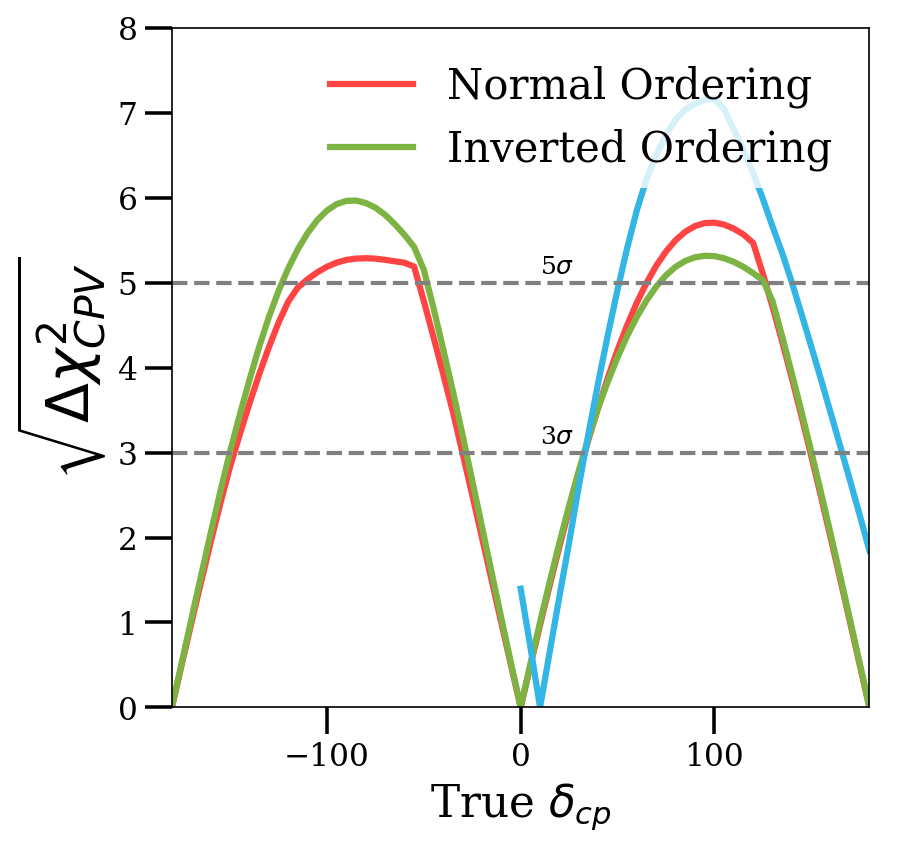

In [70]:
# THIS IS SYS+STAT for nue+numu 

# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(6,6), dpi=150)

d1 = [12,3] # 5 points on, 2 off, 3 on, 1 off
d2 = [3,3] # 5 points on, 2 off, 3 on, 1 off
d3 = [12,3, 3,3] # 5 points on, 2 off, 3 on, 1 off

ax=plt.subplot(111)
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')


plt.plot((180-dcpNO[:,2]), np.sqrt(dcpNO[:,-1]),  color=c1, linewidth=3, linestyle="-")
plt.plot((180-dcpIO[:,2]), np.sqrt(dcpIO[:,-1]),  color=c0, linewidth=3, linestyle="-")

plt.plot((180-dcp3to4[:,2]), np.sqrt(dcp3to4[:,-1]),  color=c2, linewidth=3, linestyle="-")
#plt.plot(dcp2[:,1], np.sqrt(dcp2[:,4]),  color=c1, linewidth=3, linestyle="--")

plt.plot([-180,180], [5,5],  color='gray', linewidth=2, linestyle="--")
plt.plot([-180,180], [3,3],  color='gray', linewidth=2, linestyle="--")

#plt.plot(dcp[:,1], dcp[:,3],  color=c0, linewidth=3, linestyle=":")


ax.set_xlabel(r'True $\delta_{cp}$',fontsize=label_font_size*0.75)
ax.set_ylabel(r'$\sqrt{\Delta \chi^2_{CPV}}$',fontsize=label_font_size)


# Set axis limits and 
plt.xlim(-180,180)
plt.ylim(0.0,8)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )

#plt.annotate('Global allowed\n at 99% C.L\n(1607.00011)',
 #            xy=(2.5e-3, 1.02), xycoords='data',color=cg,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=cg))

#plt.annotate('LSND allowed\n at 99% C.L',
 #            xy=(3e-3, 15), xycoords='data',color=c3,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=c3,))


plt.annotate('3$\sigma$',xy=(10, 3.1), xycoords='data',fontsize=12)
plt.annotate('5$\sigma$',xy=(10, 5.1), xycoords='data',fontsize=12)


proxy = [mlines.Line2D([], [], color=pc,linewidth=3) 
    for pc in [c1,c0]]

leg=plt.legend(proxy, ["Normal Ordering","Inverted Ordering"],fontsize=20,loc=1)
leg.get_frame().set_linewidth(0.0)

# Set y ticks
#plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()
f.savefig("dune_test.pdf", bbox_inches='tight')


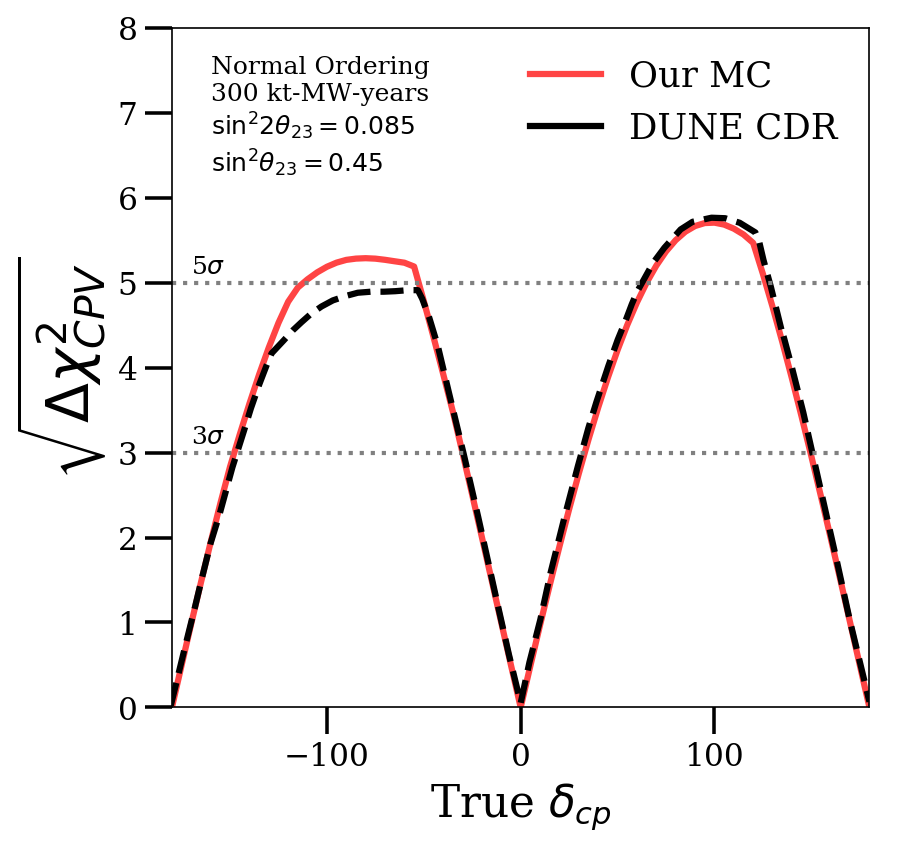

In [71]:
# THIS IS SYS+STAT for nue+numu 

# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(6,6), dpi=150)

d1 = [12,3] # 5 points on, 2 off, 3 on, 1 off
d2 = [3,3] # 5 points on, 2 off, 3 on, 1 off
d3 = [12,3, 3,3] # 5 points on, 2 off, 3 on, 1 off

ax=plt.subplot(111)
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')


plt.plot((180-dcpNO[:,2]), np.sqrt(dcpNO[:,-1]),  color=c1, linewidth=3, linestyle="-")
plt.plot(dune_cdr[:,0], dune_cdr[:,1],  color='black', linewidth=3, linestyle="--")
#plt.plot(dcp2[:,1], np.sqrt(dcp2[:,4]),  color=c1, linewidth=3, linestyle="--")

plt.plot([-180,180], [5,5],  color='gray', linewidth=2, linestyle=":")
plt.plot([-180,180], [3,3],  color='gray', linewidth=2, linestyle=":")

#plt.plot(dcp[:,1], dcp[:,3],  color=c0, linewidth=3, linestyle=":")


ax.set_xlabel(r'True $\delta_{cp}$',fontsize=label_font_size*0.75)
ax.set_ylabel(r'$\sqrt{\Delta \chi^2_{CPV}}$',fontsize=label_font_size)


# Set axis limits and 
plt.xlim(-180,180)
plt.ylim(0.0,8)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )

#plt.annotate('Global allowed\n at 99% C.L\n(1607.00011)',
 #            xy=(2.5e-3, 1.02), xycoords='data',color=cg,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=cg))

#plt.annotate('LSND allowed\n at 99% C.L',
 #            xy=(3e-3, 15), xycoords='data',color=c3,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=c3,))


plt.annotate('3$\sigma$',xy=(-170, 3.1), xycoords='data',fontsize=12)
plt.annotate('5$\sigma$',xy=(-170, 5.1), xycoords='data',fontsize=12)

plt.annotate('Normal Ordering\n300 kt-MW-years\n$\sin^2 2\\theta_{23}=0.085$\n$\sin^2 \\theta_{23}=0.45$',xy=(-160, 6.3), xycoords='data',fontsize=12)


proxy = [mlines.Line2D([], [], color=pc,linewidth=3) 
    for pc in [c1,'black']]

leg=plt.legend(proxy, ["Our MC","DUNE CDR"],fontsize=17,loc=1)
leg.get_frame().set_linewidth(0.0)

# Set y ticks
#plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()
f.savefig("dune_dpv_test.pdf", bbox_inches='tight')


In [36]:
bi3p1=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_bi_prob3p1.dat")
bi3p0=np.genfromtxt("/Users/yeon-jaejwa/sandbox/NW/norwegian_wood/build/src/DUNE_bi_prob.dat")


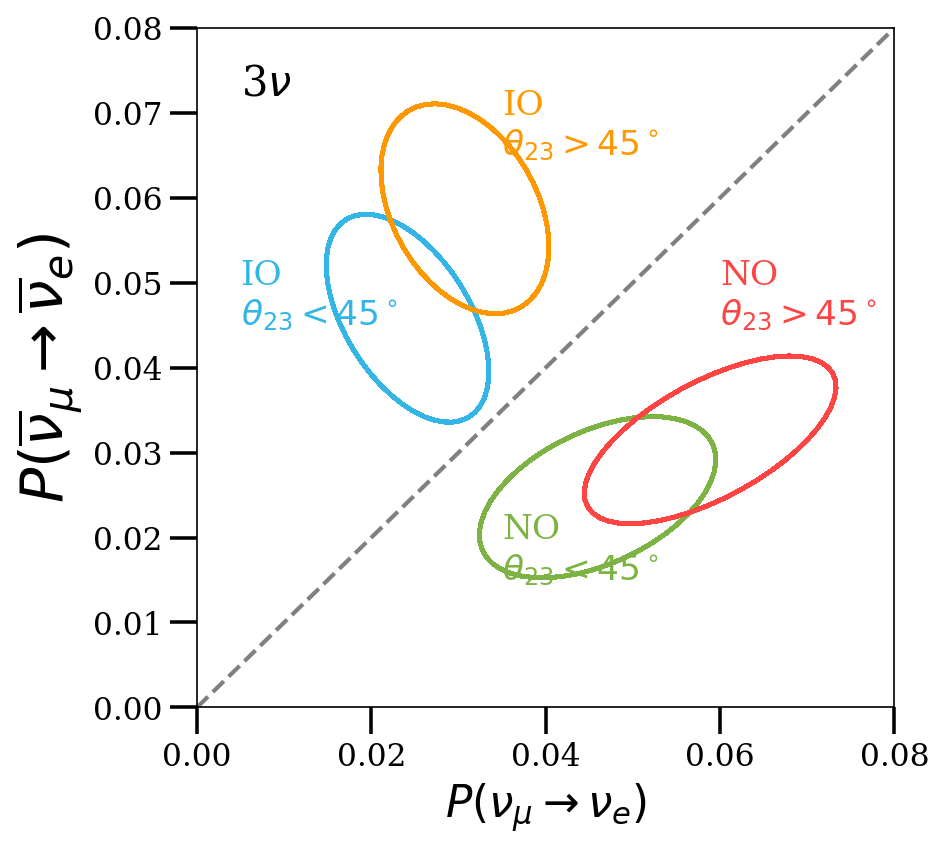

In [37]:
# THIS IS SYS+STAT for nue+numu 

# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(6,6), dpi=150)

d1 = [12,3] # 5 points on, 2 off, 3 on, 1 off
d2 = [3,3] # 5 points on, 2 off, 3 on, 1 off
d3 = [12,3, 3,3] # 5 points on, 2 off, 3 on, 1 off

ax=plt.subplot(111)
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

#yj
bi=bi3p0


plt.plot((bi[:,1]),bi[:,2]  ,color=c0, linewidth=2, linestyle="-")
plt.plot((bi[:,3]),bi[:,4]  ,color=c1, linewidth=2, linestyle="-")
plt.plot((bi[:,5]),bi[:,6]  ,color=c2, linewidth=2, linestyle="-")
plt.plot((bi[:,7]),bi[:,8]  ,color=oCols[2], linewidth=2, linestyle="-")


#plt.plot(dcp2[:,1], np.sqrt(dcp2[:,4]),  color=c1, linewidth=3, linestyle="--")

plt.plot([0,1], [0,1],  color='gray', linewidth=2, linestyle="--")

#plt.plot(dcp[:,1], dcp[:,3],  color=c0, linewidth=3, linestyle=":")


ax.set_xlabel('$P(\\nu_{\mu} \\rightarrow \\nu_{e})$',fontsize=label_font_size*0.75)
ax.set_ylabel('$P(\overline{\\nu}_{\mu} \\rightarrow \overline{\\nu}_{e})$',fontsize=label_font_size)


# Set axis limits and 
plt.xlim(0.0,0.08)
plt.ylim(0.0,0.08)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )

plt.annotate('IO\n$\\theta_{23} < 45^\circ$',
             xy=(0.005, 0.045), xycoords='data',color=c2,
              fontsize=text_font_size*0.75)

plt.annotate('NO\n$\\theta_{23} > 45^\circ$',
             xy=(0.06, 0.045), xycoords='data',color=c1,
              fontsize=text_font_size*0.75)


plt.annotate('IO\n$\\theta_{23} > 45^\circ$',
             xy=(0.035, 0.065), xycoords='data',color=oCols[2],
              fontsize=text_font_size*0.75)

plt.annotate('NO\n$\\theta_{23} < 45^\circ$',
             xy=(0.035, 0.015), xycoords='data',color=c0,
              fontsize=text_font_size*0.75)



#plt.annotate('LSND allowed\n at 99% C.L',
 #            xy=(3e-3, 15), xycoords='data',color=c3,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=c3,))


plt.annotate('3$\\nu$',xy=(0.005, 0.072), xycoords='data',fontsize=20)


# Set y ticks
#plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()
f.savefig("dune_biprob_3p0.pdf", bbox_inches='tight')


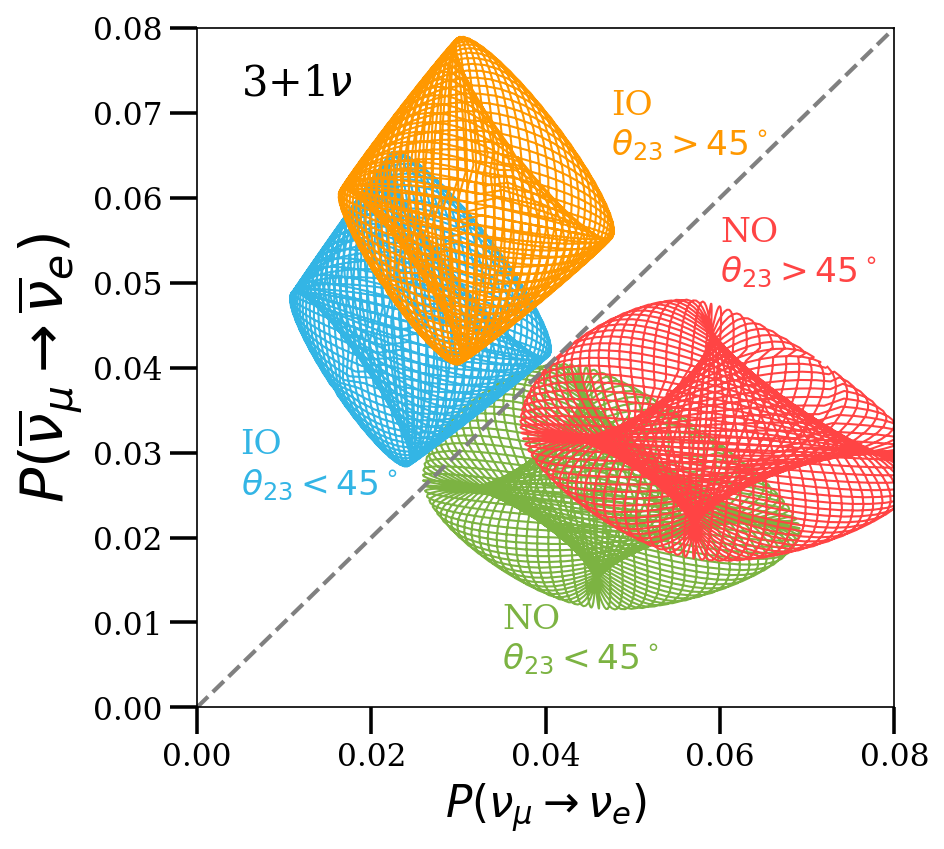

In [38]:
# THIS IS SYS+STAT for nue+numu 

# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(6,6), dpi=150)

d1 = [12,3] # 5 points on, 2 off, 3 on, 1 off
d2 = [3,3] # 5 points on, 2 off, 3 on, 1 off
d3 = [12,3, 3,3] # 5 points on, 2 off, 3 on, 1 off

ax=plt.subplot(111)
#ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')


plt.plot((bi3p1[:,1]),bi3p1[:,2]  ,color=c0, linewidth=1, linestyle="-")
plt.plot((bi3p1[:,3]),bi3p1[:,4]  ,color=c1, linewidth=1, linestyle="-")
plt.plot((bi3p1[:,5]),bi3p1[:,6]  ,color=c2, linewidth=1, linestyle="-")
plt.plot((bi3p1[:,7]),bi3p1[:,8]  ,color=oCols[2], linewidth=1, linestyle="-")


#plt.plot(dcp2[:,1], np.sqrt(dcp2[:,4]),  color=c1, linewidth=3, linestyle="--")

plt.plot([0,1], [0,1],  color='gray', linewidth=2, linestyle="--")

#plt.plot(dcp[:,1], dcp[:,3],  color=c0, linewidth=3, linestyle=":")


ax.set_xlabel('$P(\\nu_{\mu} \\rightarrow \\nu_{e})$',fontsize=label_font_size*0.75)
ax.set_ylabel('$P(\overline{\\nu}_{\mu} \\rightarrow \overline{\\nu}_{e})$',fontsize=label_font_size)


# Set axis limits and 
plt.xlim(0.0,0.08)
plt.ylim(0.0,0.08)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )

plt.annotate('IO\n$\\theta_{23} < 45^\circ$',
             xy=(0.005, 0.025), xycoords='data',color=c2,
              fontsize=text_font_size*0.75)

plt.annotate('NO\n$\\theta_{23} > 45^\circ$',
             xy=(0.06, 0.05), xycoords='data',color=c1,
              fontsize=text_font_size*0.75)


plt.annotate('IO\n$\\theta_{23} > 45^\circ$',
             xy=(0.0475, 0.065), xycoords='data',color=oCols[2],
              fontsize=text_font_size*0.75)

plt.annotate('NO\n$\\theta_{23} < 45^\circ$',
             xy=(0.035, 0.0045), xycoords='data',color=c0,
              fontsize=text_font_size*0.75)



#plt.annotate('LSND allowed\n at 99% C.L',
 #            xy=(3e-3, 15), xycoords='data',color=c3,
  #           xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
   #          arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=c3,))


plt.annotate('3+1$\\nu$',xy=(0.005, 0.072), xycoords='data',fontsize=20)


# Set y ticks
#plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()
f.savefig("dune_biprob_3p1.pdf", bbox_inches='tight')
